In [3]:
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda

In [3]:
from MDAnalysis.tests.datafiles import RANDOM_WALK_TOPO, RANDOM_WALK

u1 = mda.Universe(RANDOM_WALK_TOPO, RANDOM_WALK)
MSD1 = msd.EinsteinMSD(u1, select='all', msd_type='xyz', fft=True)
MSD1.run()

msd1 =  MSD1.results.timeseries
msd1.shape

/home/wongmw/Softwares/Miniforge3/envs/mda/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:348: UserWarning: Unknown element X found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/wongmw/Softwares/Miniforge3/envs/mda/lib/python3.10/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: X
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
100%|██████████| 100/100 [00:00<00:00, 7089.76it/s]


(100,)

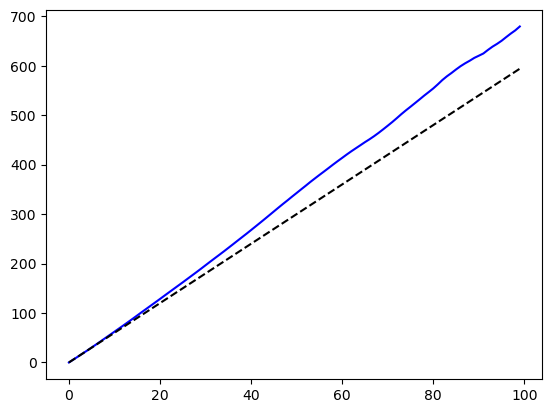

In [4]:
nframes = MSD1.n_frames
timestep = 1 # this needs to be the actual time between frames
lagtimes = np.arange(nframes)*timestep # make the lag-time axis
fig = plt.figure()
ax = plt.axes()
# plot the actual MSD
ax.plot(lagtimes, msd1, c="blue", ls="-", label=r'3D random walk')
exact = lagtimes*6
# plot the exact result
ax.plot(lagtimes, exact, c="black", ls="--", label=r'$y=2 D\tau$')
# plt.show()

100%|██████████| 274/274 [00:00<00:00, 6862.07it/s]


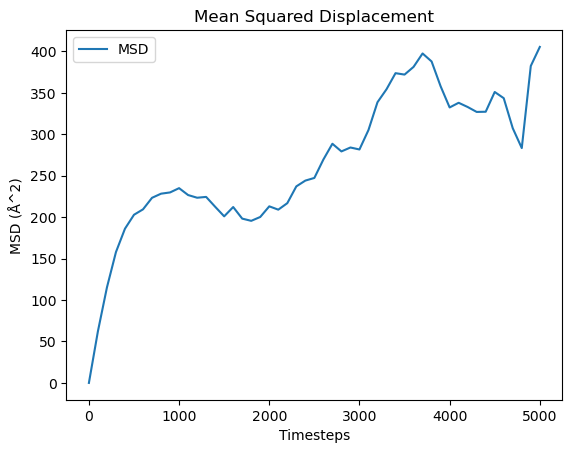

In [14]:
import MDAnalysis.analysis.msd as msd
import MDAnalysis.analysis.rdf as rdf

dump_file = r'dump/dump_eq.lammpstrj'

# u_ = mda.Universe(dump_file, format="data", atom_style='id molecule type charge x y z')

# Create a Universe from the LAMMPS trajectory file
u_trj = mda.Universe(dump_file, format="LAMMPSDUMP")
# ATOMS id type q x y z

# Define the atom group (e.g., all atoms)
atom_group = u_trj.select_atoms("all")

# Compute MSD
MSD1 = msd.EinsteinMSD(atom_group, msd_type='xyz', fft=True)
MSD1.run()

nframes = MSD1.n_frames
timestep = 100 # time between frames
lagtimes = np.arange(nframes)*timestep # make the lag-time axis

# Plot MSD
plt.figure()
plt.plot(lagtimes, MSD1.results.timeseries, label='MSD')
plt.xlabel('Timesteps')
plt.ylabel('MSD (Å^2)')
plt.title('Mean Squared Displacement')
plt.legend()

In [6]:
data_file = r'333-EXP-11-vasp.data'
u3 = mda.Universe(data_file, format="data", atom_style='id molecule type charge x y z')

75 75


/home/wongmw/Softwares/Miniforge3/envs/mda/lib/python3.10/site-packages/MDAnalysis/analysis/base.py:447: UserWarning: Reader has no dt information, set to 1.0 ps
  self.times[i] = ts.time


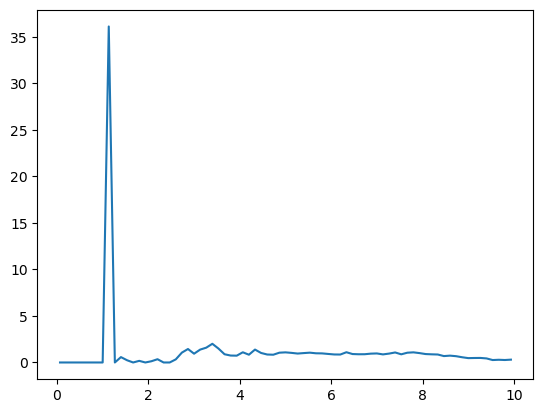

In [7]:
s1 = u3.select_atoms('type 1')
s2 = u3.select_atoms('type 2')
s3 = u3.select_atoms('type 3')
s4 = u3.select_atoms('type 4')

atomgroups = [[s1, s2], [s3, s4]]
atomgroups = [[s1, s3], [s2, s4]]
RDF1 = rdf.InterRDF(s1, s2, nbins=75, range=(0.0, 10.0))
RDF1.run()

print(len(RDF1.results.bins), len(RDF1.results.rdf))
plt.plot(RDF1.results.bins, RDF1.results.rdf)

/home/wongmw/Softwares/Miniforge3/envs/mda/lib/python3.10/site-packages/MDAnalysis/analysis/rdf.py:554: DeprecationWarning: The `u` attribute is superflous and will be removed in MDAnalysis 3.0.0.
  warnings.warn("The `u` attribute is superflous and will be removed "


75 2


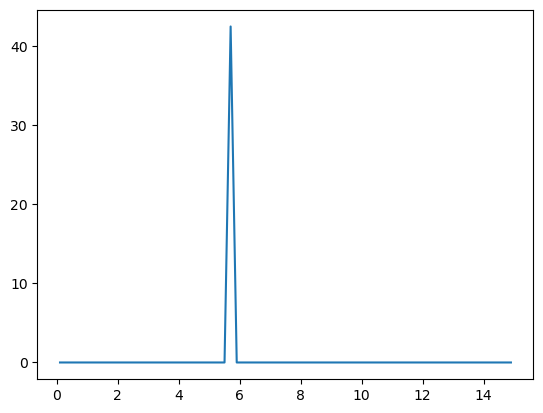

In [ ]:
s1 = u3.select_atoms('type 1')
s2 = u3.select_atoms('type 2')
s3 = u3.select_atoms('type 3')
s4 = u3.select_atoms('type 4')

atomgroups = [[s1, s2], [s3, s4]]
RDF1 = rdf.InterRDF_s(u3, atomgroups, nbins=75, range=(0.0, 15.0))
RDF1.run()

print(len(RDF1.results.bins), len(RDF1.results.rdf))
plt.plot(RDF1.results.bins, RDF1.results.rdf[0][0, 0])